In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [8]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [9]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [10]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [12]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [14]:
byMonth = df.groupby('Month').count()

In [15]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


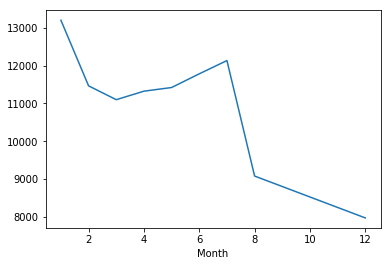

In [16]:
byMonth['lat'].plot()

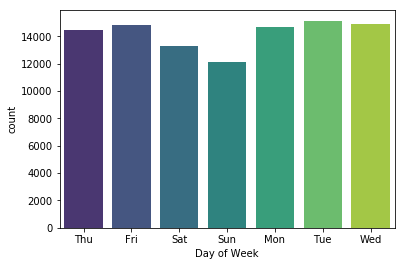

In [17]:
sns.countplot(x='Day of Week',data=df, palette='viridis')

In [18]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


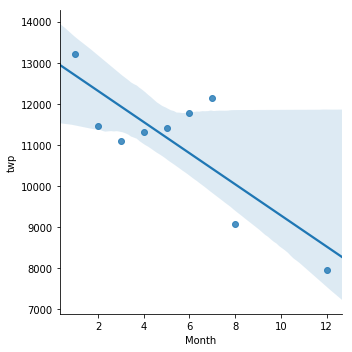

In [19]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [20]:
t = df['timeStamp'].iloc[0]

In [21]:
t

Timestamp('2015-12-10 17:40:00')

In [22]:
t.date()

datetime.date(2015, 12, 10)

In [23]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [25]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [26]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
2015-12-15    421
2015-12-16    377
2015-12-17    388
2015-12-18    346
2015-12-19    279
2015-12-20    271
2015-12-21    430
2015-12-22    448
2015-12-23    524
2015-12-24    445
2015-12-25    323
2015-12-26    296
2015-12-27    317
2015-12-28    380
2015-12-29    365
2015-12-30    361
2015-12-31    318
2016-01-01    263
2016-01-02    335
2016-01-03    324
2016-01-04    402
2016-01-05    448
2016-01-06    434
2016-01-07    385
2016-01-08    359
             ... 
2016-07-26    446
2016-07-27    421
2016-07-28    443
2016-07-29    431
2016-07-30    353
2016-07-31    381
2016-08-01    384
2016-08-02    404
2016-08-03    403
2016-08-04    422
2016-08-05    422
2016-08-06    378
2016-08-07    332
2016-08-08    378
2016-08-09    350
2016-08-10    345
2016-08-11    449
2016-08-12    441
2016-08-13    393
2016-08-14    332
2016-08-15    360
2016-08-16    419
2016-08-17    415
2016-08-18    359
2016-

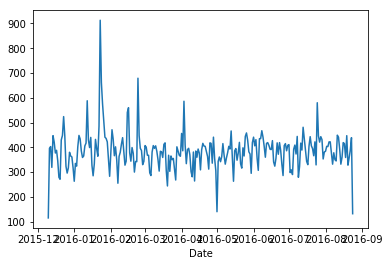

In [27]:
df.groupby('Date').count()['lat'].plot()

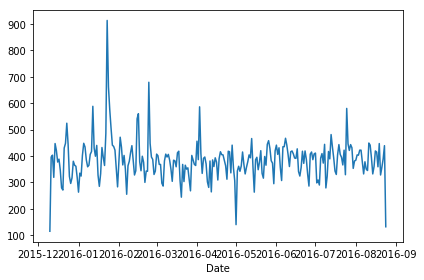

In [28]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

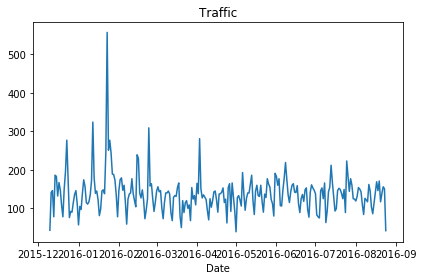

In [29]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

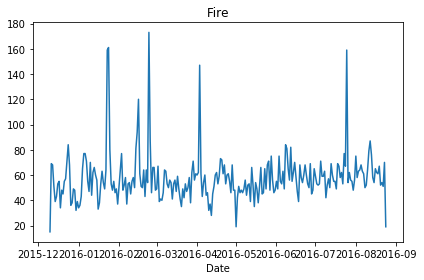

In [30]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

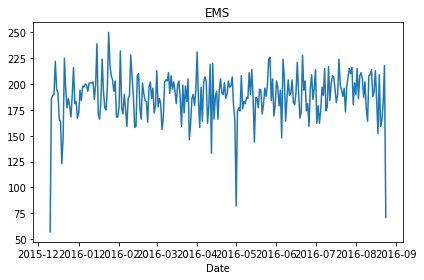

In [31]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [32]:
df.groupby(by=['Day of Week','Hour']).count()

lat   lng  desc  zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                              
Fri         0      275   275   275  248    275        275   275   275   275   
            1      235   235   235  200    235        235   235   232   235   
            2      191   191   191  165    191        191   191   191   191   
            3      175   175   175  164    175        175   175   175   175   
            4      201   201   201  184    201        201   201   201   201   
            5      194   194   194  166    194        194   194   194   194   
            6      372   372   372  319    372        372   372   369   372   
            7      598   598   598  526    598        598   598   593   598   
            8      742   742   742  637    742        742   742   737   742   
            9      752   752   752  663    752        752   752   748   752   
            10     803   803   803  722    803        803   803   800   803   
            11     859   859   859  756    859        859   859   858   859   
            12     885   885   885  764    885        885   885   877   885   
            13     890   890   890  767    890        890   890   885   890   
            14     932   932   932  808    932        932   931   926   932   
            15     980   980   980  840    980        980   980   976   980   
            16    1039  1039  1039  897   1039       1039  1039  1038  1039   
            17     980   980   980  826    980        980   980   971   980   
            18     820   820   820  714    820        820   819   818   820   
            19     696   696   696  616    696        696   696   693   696   
            20     667   667   667  569    667        667   667   666   667   
            21     559   559   559  491    559        559   558   553   559   
            22     514   514   514  445    514        514   514   513   514   
            23     474   474   474  400    474        474   474   469   474   
Mon         0      282   282   282  243    282        282   282   282   282   
            1      221   221   221  198    221        221   220   221   221   
            2      201   201   201  183    201        201   201   201   201   
            3      194   194   194  173    194        194   194   194   194   
            4      204   204   204  185    204        204   204   203   204   
            5      267   267   267  222    267        267   267   267   267   
...                ...   ...   ...  ...    ...        ...   ...   ...   ...   
Tue         18     905   905   905  761    905        905   905   900   905   
            19     731   731   731  666    731        731   731   722   731   
            20     647   647   647  579    647        647   647   646   647   
            21     571   571   571  494    571        571   570   565   571   
            22     462   462   462  411    462        462   462   460   462   
            23     274   274   274  245    274        274   274   273   274   
Wed         0      250   250   250  226    250        250   249   249   250   
            1      216   216   216  193    216        216   216   216   216   
            2      189   189   189  169    189        189   189   188   189   
            3      209   209   209  195    209        209   207   209   209   
            4      156   156   156  138    156        156   156   155   156   
            5      255   255   255  224    255        255   254   254   255   
            6      410   410   410  334    410        410   409   409   410   
            7      701   701   701  591    701        701   701   692   701   
            8      875   875   875  770    875        875   875   872   875   
            9      808   808   808  714    808        808   808   805   808   
            10     800   800   800  713    800        800   800   799   800   
            11     789   789   789  698    789        789   789   784

In [33]:
df.groupby(by=['Day of Week','Hour']).count()['Reason']

Day of Week  Hour
Fri          0        275
             1        235
             2        191
             3        175
             4        201
             5        194
             6        372
             7        598
             8        742
             9        752
             10       803
             11       859
             12       885
             13       890
             14       932
             15       980
             16      1039
             17       980
             18       820
             19       696
             20       667
             21       559
             22       514
             23       474
Mon          0        282
             1        221
             2        201
             3        194
             4        204
             5        267
                     ... 
Tue          18       905
             19       731
             20       647
             21       571
             22       462
             23       274
Wed          0      

In [34]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [35]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Text(0.5,1,'Heat Map')

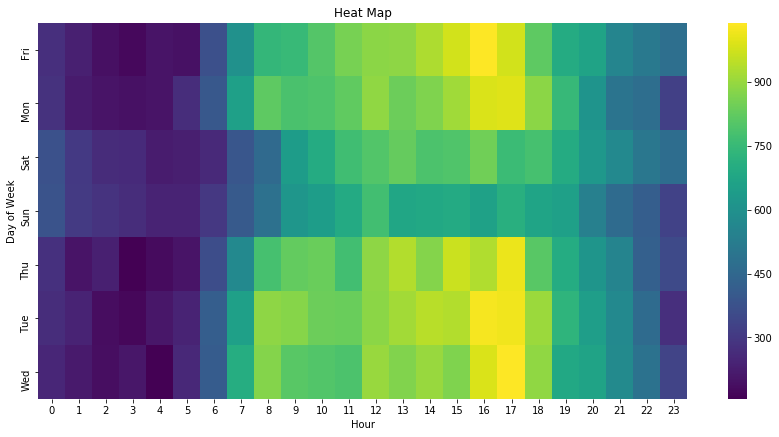

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
plt.tight_layout()
plt.title('Heat Map')

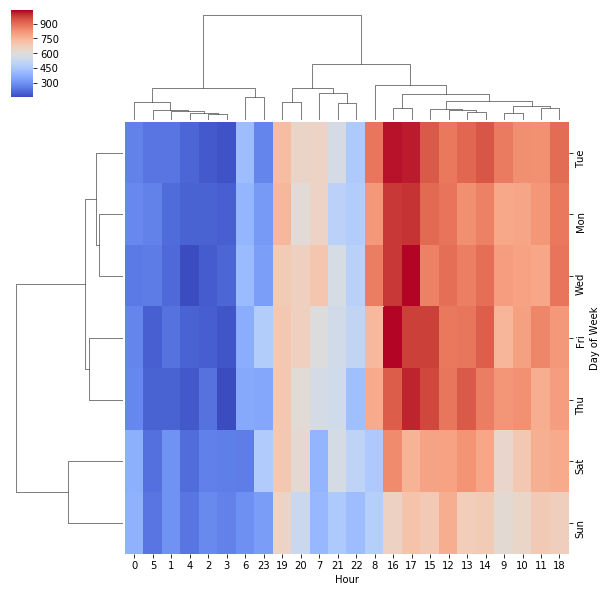

In [57]:
sns.clustermap(dayHour,cmap='coolwarm')

In [53]:
df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [54]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

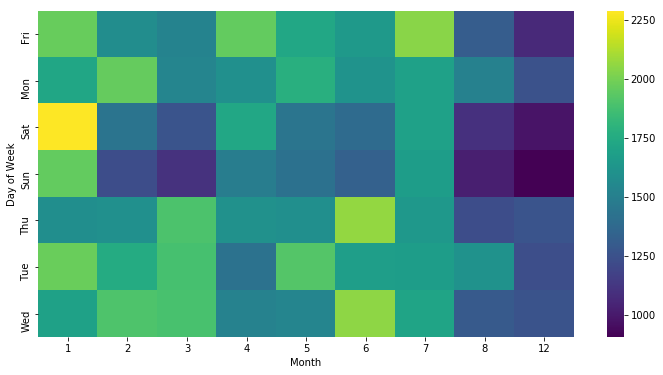

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

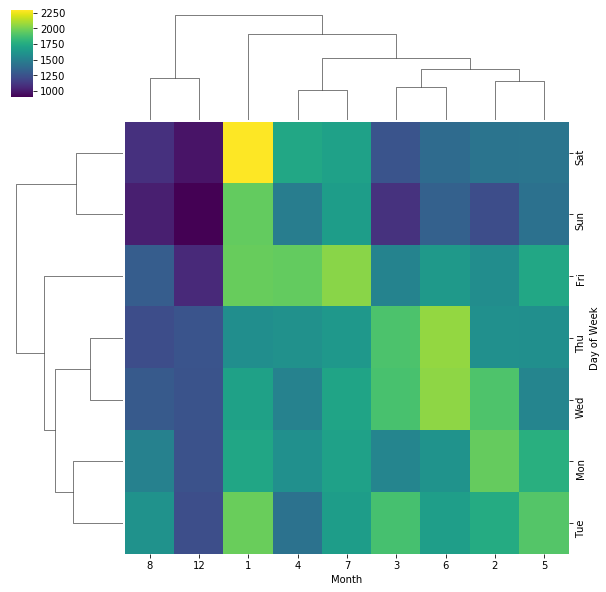

In [56]:
sns.clustermap(dayMonth,cmap='viridis')